,x,z,y
0,0.000000,0.204082,0.000000
1,0.408163,0.612245,5.166597
2,0.816327,1.020408,1.666389
3,1.224490,1.428571,3.499375
4,1.632653,1.836735,4.665556
5,2.040816,2.244898,8.164931
6,2.448980,2.653061,6.997501
7,2.857143,3.061224,9.163265
8,3.265306,3.469388,14.662224
9,3.673469,3.877551,13.494377


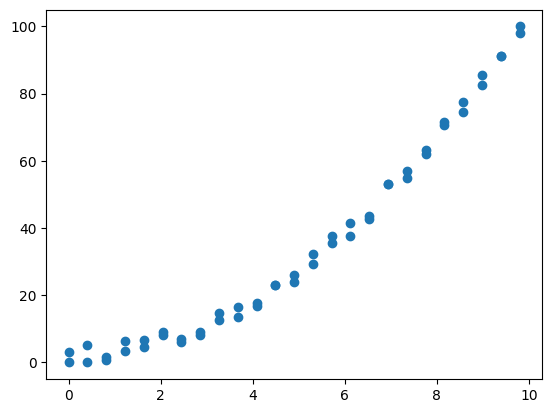

In [1]:
import pandas as pd
import numpy as np
from random import randint, choice, uniform

def func(x):
    return x**2 + randint(0, 5)
vfunc = np.vectorize(func)

X = np.array([np.linspace(0, 10), np.linspace(0, 10)]).reshape(-1, 2)
y = vfunc(X[:, 0])

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], y)

data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
data.columns = ["x", "z", "y"]
data.to_csv("data", index=False)
data

In [2]:
data = pd.read_csv("data")
X = data.drop(columns=["y"], axis=1)
np.c_[X].shape

(50, 2)

# Trees

In [3]:
class Tree:
    class Position:
        
        def element(self):
            raise NotImplementedError("Must be implemented by subclass")
        
        def __eq__(self, other):
            raise NotImplementedError("Must be implemented by subclass")
        
        def __neq__(self, other):
            raise not (self == other)
        
    def root(self):
        raise NotImplementedError("Must be implemented by subclass")
    
    def parent(self, p):
        """raise the Position representing p's parent"""
        raise NotImplementedError("Must be implemented by subclass")
                                                                                                                                                                                                                                                                                    
    def num_children(self, p):
        raise NotImplementedError("Must be implemented by subclass")
        
    def children(self, p):
        raise NotImplementedError("Must be implemented by subclass")

    def __len__(self):
        raise NotImplementedError("Must be implemented by subclass")
        
    def is_root(self, p):
        return self.root() == p
    
    def is_leaf(self, p):
        return self.num_children(p) == 0
    
    def is_empty(self):
        return len(self) == 0
    
    # ------------------------- Preorder -------------------------
    
    def preorder(self):
        if not self.is_empty():
             for p in self._subtree_preorder(self.root()):
                    yield p
    
    def _subtree_preorder(self, p):
        yield p
        for c in self.children(p):
            for other in self._subtree_preorder(c):
                yield other
                
    # ------------------------- Postorder -------------------------
    
    def postorder(self):
        if not self.is_empty():
            for p in self._subtree_postorder(self.root()):
                yield p
    
    def _subtree_postorder(self, p):
        for c in self.children(p):
            for other in self._subtree_postorder(c):
                yield other
        yield p
        
    # ------------------------- Inorder -------------------------
    
    def inorder(self):
        if not self.is_empty():
            for p in self._subtree_inorder(self.root()):
                yield p
    
    def _subtree_inorder(self, p):
        if self.left(p) is not None:
            for other in self._subtree_inorder(self.left(p)):
                yield other
        yield p
        if self.right(p) is not None:
            for other in self._subtree_inorder(self.right(p)):
                yield other
    
    def positions(self):
        return self.preorder()
    
    def __iter__(self):
        for p in self.positions():
            yield p.element()

In [4]:
class BinaryTree(Tree):
    def left(self, p):
        raise NotImplementedError("Must be implemented by subclass")
        
    def right(self, p):
        raise NotImplementedError("Must be implemented by subclass")
        
    def sibling(self, p):
        parent = self.parent(p)
        
        if parent is None:  # if p is root
            return None
        
        if p == self.left(parent):
            return self.right(parent)
        else:
            return self.left(parent)
        
    def children(self, p):
        if self.left(p) is not None:
            yield self.left(p)
        if self.right(p) is not None:
            yield self.right(p)

In [5]:
import graphviz

class LinkedBinaryTree(BinaryTree):
    
    class Node:
        __slots__ = "_element", "_parent", "_left", "_right"
        def __init__(self, element, parent=None, left=None, right=None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right
            
    #implementing what was left in the position subclass
    class Position(BinaryTree.Position):
        
        def __init__(self, container, node):
            self._container = container
            self.Node = node
            
        def element(self):
            return self.Node._element
        
        def __eq__(self, other):
            return type(other) is type(self) and other.Node is self.Node
        
    def _validate(self, p):
        """Return associated node, if position p is valid"""
        
        if not isinstance(p, self.Position):
            raise TypeError("p must be proper Position type")
            
        if p._container is not self:
            raise ValueError("p does not belong to this container")
            
        if p.Node._parent is p.Node:   # Convention for deprecated nodes
            raise ValueError("p is no longer valod")
            
        return p.Node
    
    def _make_position(self, node):
        return self.Position(self, node) if node is not None else None
    
    
    
    def __init__(self):
        self._root = None
        self._size = 0
    
    
    # ------------- public accessors -------------
    def __len__(self):
        return self._size
    
    def root(self):
        return self._make_position(self._root)
    
    def parent(self, p):
        node = self._validate(p)
        return self._make_position(node._parent)
    
    def left(self, p):
        node = self._validate(p)
        return self._make_position(node._left)
    
    def right(self, p):
        node = self._validate(p)
        return self._make_position(node._right)
    
    def num_children(self, p):
        """Number of direct children of Position p"""
        node = self._validate(p)
        count = 0
        
        if node._left is not None:   #left child exists
            count += 1
        if node._right is not None:  #right child exists
            count += 1
        return count
    
    def add_root(self, e):
        """Place element e at the root of an empty tree and return new Position
        
        Raise ValueError is tree nonempty"""
        
        if self._root is not None: raise ValueError("Root exisits")
        self._size = 1
        self._root = self.Node(e)
        return self._make_position(self._root)
    
    def add_left(self, p, e):
        """Create a new left child for Position p, storing element e
        
        Return the Position of new node
        Raise ValueError is Position p is invalid or p alredy has a left child"""
        
        node = self._validate(p)
        if node._left is not None: raise ValueError("Left child exists")
        self._size += 1
        node._left = self.Node(e, node)
        return self._make_position(node._left)
    
    def add_right(self, p, e):
        """Create a new right child for Position p, storing element e
        
        Return the Position of new node
        Raise ValueError is Position p is invalid or p alredy has a right child"""
        
        node = self._validate(p)
        if node._right is not None: raise ValueError("Right child exists")
        self._size += 1
        node._right = self.Node(e, node)
        return self._make_position(node._right)
    
    def replace(self, p, e):
        """Replace the element at position p with e, and return old element"""
        
        node = self._validate(p)
        old = node._element
        node._element = e
        return old
    
    def delete(self, p):
        """Delete the node at Position p and replace it with its child, if any.
        
        Return the element that had been stored at Position p.
        Raise ValueError if Position p is invalid or p has two children"""
        
        node = self._validate(p)
        if self.num_children(p) == 2: raise ValueError("p has two children")
        child = node._left if node._left else node._right    #might be None
        
        if child is not None:
            child._parent = node._parent
        
        if node is self._root:   # if node = root child becomes new root
            self._root = child
        else:    # if not must update grandparent
            parent = node._parent
            if node is parent._left:
                parent._left = child
            else:
                parent._right = child
            self._size -= 1
            node._parent = node   #convention for deprecated node
            return node._element
        
    def _attach(self, p, t1=None, t2=None):
        """Attach trees t1 and t2 as left and right subtrees of external p
        
        Raise ValueError if p is not a leaf
        Raise TypeError is all three tree types are not the same"""
        
        node = self._validate(p)
        if not self.is_leaf(p): raise ValueError("Position must be leaf")
        
        # check if all 3 are trees of the same type
        if not type(self) is type(t1) is type(t2):
            raise TypeError("Tree types must match")    
        self._size += len(t1) + len(t2)   # we use len becouse ._size is private and t1 and t2 are external
        
        # Attach t1 to the left
        if not t1.is_empty():
            t1._root._parent = node
            node._left = t1._root
            t1._root = None   # Set t1 instance to empty
            t1._size = 0
        # Attach t2 to the right
        if not t2.is_empty():
            t2._root._parent = node
            node._right = t2._root
            t2._root = None
            t2._size = 0
        

In [6]:
class ExpressionTree(LinkedBinaryTree):
    """This class is specific to the symbolic """
    class Node:
        __slots__ = "_element", "_parent", "_left", "_right", "_element_type"
        def __init__(self, element, parent=None, left=None, right=None, element_type=None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right
            
            self._element_type = element_type
        
        def element(self):
            return self._element
            
    class Position(LinkedBinaryTree.Position):
        def element_type(self):
            return self.Node._element_type
        
    # Added element type
    def add_root(self, e, e_type=None):
        """Place element e at the root of an empty tree and return new Position
        
        Raise ValueError is tree nonempty"""
        
        if self._root is not None: raise ValueError("Root exisits")
        self._size = 1
        self._root = self.Node(e, element_type=e_type)
        return self._make_position(self._root)
    
    # Added element type
    def add_left(self, p, e, e_type=None):
        """Create a new left child for Position p, storing element e
        
        Return the Position of new node
        Raise ValueError is Position p is invalid or p alredy has a left child"""
        
        node = self._validate(p)
        if node._left is not None: raise ValueError("Left child exists")
        self._size += 1
        node._left = self.Node(e, node, element_type = e_type)
        return self._make_position(node._left)
        
    # Added element type
    def add_right(self, p, e, e_type=None):
        """Create a new right child for Position p, storing element e
        
        Return the Position of new node
        Raise ValueError is Position p is invalid or p alredy has a right child"""
        
        node = self._validate(p)
        if node._right is not None: raise ValueError("Right child exists")
        self._size += 1
        node._right = self.Node(e, node, element_type = e_type)
        return self._make_position(node._right)
    
    # added element type
    def replace(self, p, e, e_type=None):
        """Replace the element at position p with e, and return old element"""
        
        node = self._validate(p)
        old = node._element
        node._element = e
        node._element_type = e_type
        return old
    
    def is_left(self, p):
        return p == self.left(self.parent(p))
    
    def attach_subtree(self, p, subtree):
        """Removes the informod position p and attaches the input subtree in its place. 
        p must be a leaf"""
        if not self.is_leaf(p): raise ValueError("Position must be leaf")

        # check if all 3 are trees of the same type
        if not type(self) is type(subtree):
            raise TypeError("Tree types must match")    
        self._size += len(subtree) - 1 # -1 since we'll remove the leaf 
        
        if subtree.is_empty():
            raise ValueError("Tree can't be empty")
        
        parent = self.parent(p)
        node = self._validate(parent)
        # Attach to the left
        if self.is_left(p):
            self.delete(p)
            subtree._root._parent = node
            node._left = subtree._root
            subtree._root = None   
            subtree._size = 0
        # Attach to the right
        else:
            self.delete(p)
            subtree._root._parent = node
            node._right = subtree._root
            subtree._root = None
            subtree._size = 0
            
    def visualize_binary_tree(self, root):
        """!!!!!!!!!!Rework"""
        dot = graphviz.Digraph()
        dot.node(str(root.element()))

        def add_nodes_edges(node):
            if self.left(node):
                dot.node(str(self.left(node).element()))
                dot.edge(str(node.element()), str(self.left(node).element()))
                add_nodes_edges(self.left(node))
            if self.right(node):
                dot.node(str(self.right(node).element()))
                dot.edge(str(node.element()), str(self.right(node).element()))
                add_nodes_edges(self.right(node))

        add_nodes_edges(root)
        # dot.render('binary_tree', view=True, format='png')
        return dot
    
    def copy_tree(self, root):
        """!!!!!!! Não muito eficiente pois precisa de um loop para definir os pais de cada nó"""
        new_tree = ExpressionTree()
        
        def auxilary_function(root):
            """Recursive part of copying the tree"""
            if root == None:
                return None
            
            new_node = new_tree.Node(root._element, element_type=root._element_type)
            parent_node = new_node
            new_node._left = auxilary_function(root._left)
            new_node._right = auxilary_function(root._right)
            
            return new_node
        
        def set_parents(new_tree):
            """Correctly assigns the parent to each node on the tree"""
            new_tree.root().Node._parent = None
            for p in new_tree.preorder():

                if new_tree.left(p):
                    p.Node._left._parent = p.Node
                if new_tree.right(p):
                    p.Node._right._parent = p.Node
        
        new_tree._root = auxilary_function(root.Node)
        new_tree._size = self._size
        set_parents(new_tree)
        
        return new_tree
    
        

# Bruto Force Elitist GP Symbolic Regression

In [21]:
class SymbolicRegression():
    """X: N vector of independent M-featured training points
       Y: N vector f dependent variables
       G: Number of generations to train
       Output: Champion s-expression individual
       Parameters: maxPopSize MasIslandCount
       
       Summary: Brute force elitist GP searches for a champion s-expression by randomly growing and scoring a
                large number of candidate s-expressions, then iteratively creating and scoring new candidate
                s-expressions via mutation and crossover. After each iteration, the population of candidate
                s-expressions is truncated to those with the best fitness score. After the final iteration, the
                champion is the s-expression with the best fitness score"""
    
    def __init__(self, X, Y, G, feature_names=None, label_name="y"):
        """- feature_names: A list containing the names of every feature in X"""
        
        self.X = X
        self.Y = Y
        self.G = G
        
        
        if feature_names == None:
            self._feature_names = ["x" + f"{i}" for i in range(0, X.shape[1])]
        else:
            self._feature_names = feature_names
            
        self.label_name = label_name
        
        self._operators = ["+", "-", "*", "/"]
        self._functions = ["abs", "sqrt", "square", "cube", "quart", "cos", "sin",
                          "tan", "tanh", "log", "exp"] # "max", "min"
            
        self._options = {"operator": lambda: choice(self._operators), "function": lambda: choice(self._functions),
                        "feature": lambda: choice(self._feature_names), "constant": lambda: round(uniform(0,10), 3)}
        
    
    def _generate_placeholder_tree(self, size):
        """Generates a placeholder tree that later will be randomly filled to create a random expression, respecting
        the operations."""
        tree = ExpressionTree()
        
        p = tree.add_root(0)
        
        def auxilary_generator(size, p):
            if size <= 0:
                return None            

            left_size = randint(0, size-1) 
            right_size = size - left_size - 1

            # Sometimes skips the left node - thus making possible to generate functions
            if randint(0,1): 
                left_p = tree.add_left(p, 0)
                auxilary_generator(left_size, left_p)
                
            right_p = tree.add_right(p, 0)
            auxilary_generator(right_size, right_p)
        
        auxilary_generator(size, p)
        
        return tree
    
    def generate_expr(self, size):
        """Creates and returns a random expression tree of a given size."""
        tree = self._generate_placeholder_tree(size)
        
        for p in tree.inorder():
            
            if tree.is_leaf(p):
                if randint(0,1):
                    tree.replace(p, choice(self._feature_names), "feature")
                else:
                    tree.replace(p, round(uniform(0,1), 3), "constant")
            elif tree.num_children(p) > 1:
                tree.replace(p, choice(self._operators), "operator")
            elif tree.num_children(p) == 1:
                tree.replace(p, choice(self._functions), "function")
                
        return tree

    def mutateSExp(self, me):
        """mutateSExp randomly alters an input s-expression by replacing a randomly selected sub expression 
        with a new randomly grown sub expression"""
        
        copied = me.copy_tree(me.root())
        L = len(me)
        n_steps = randint(0, L)
        
        for c, p in enumerate(copied.inorder()):
            if c == n_steps:
                
                if not copied.is_leaf(p):
                    print("nao folha")
                    copied.replace(p, self._options[p.element_type()](), p.element_type())
                    
                else:
                    random_number = randint(0,2)
                    print("number:", random_number)
                    
                    if random_number == 0:
                        copied.replace(p, self._options[p.element_type()](), p.element_type())

                    elif random_number == 1:
                        size = randint(1, 2)
                        subtree = self.generate_expr(size)
                        
                        copied.attach_subtree(p,subtree)
                    
                    elif random_number == 2:
                        parent = copied.parent(p)
                        print(parent.element())
                        print(p.element())
                        e_type = parent.element_type()
                        copied.delete(p)
                        
                        if e_type == "fuction": # if the parent was function becomes feature or constant
                            if randint(0,1):
                                copied.replace(parent, choice(self._feature_names), "feature")
                            else:
                                copied.replace(parent, uniform(0,1), "constant")
                        else: # can only be operator
                            copied.replace(parent, choice(self._functions), "function")
        
                break        
        return copied
    
    
    def crossoverSExp(self, mom, dad):
        """crossoverSExp randomly alters a mom input s-expression by replacing a randomly selected sub expression
        in mom with a randomly selected sub expression from dad."""
        
        """!!!!!!!!!!Just like in mutation, must implent types of subtrees that are possible to get from father, and for each type
        do a specific operation in mom"""
        
        dad = dad.copy_tree(dad.root())
        mom = mom.copy_tree(mom.root())
        Ld = len(dad)
        Lm = len(mom)
        n = randint(0, Ld-1)
        m = randint(0, Lm-1)
        
        # getting father sub expression
        for c, p in enumerate(dad.inorder()):
            if c == n:
                sub_expression = dad.copy_tree(p)
                break
        
        for c, p in enumerate(mom.inorder()):
            if (c >= m) and (mom.is_leaf(p)):
                mom.attach_subtree(p, sub_expression)
                break
        
        return mom
    
    def optimizeConstants(self, me):
        """Optimize any embedded constants in me"""
        return self.mutateSExp(me)
        
    def insertLambda(self, population, lamb):
        """Inserts the specified lambda into the specified population unordered
        population: Numpy array
        lambda: Expression tree
        """
        if len(population) <= 0:
            population = np.array([])
        
        np.append(population, lamb)
        return lamb
    
    def populationPrunning(self, inPopulation, outPopulation, islands):
        """ - Copies the input populat9ion into the output population.
            - Adds random individuals to the output population.
            - Sorts the output population in ascending order of fitness score.
            - Truncates the output population to the maximum population size.
            - Always organizes the population into a single island"""
        
        

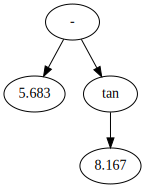

In [22]:
SR = SymbolicRegression(X, y, 3)
tree = SR.generate_expr(2)

tree.visualize_binary_tree(tree.root())

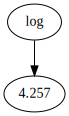

In [9]:
new_tree = tree.copy_tree(tree.root())
display(new_tree.visualize_binary_tree(new_tree.root()))

number: 0


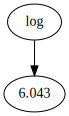

In [10]:
mutated_tree = SR.mutateSExp(tree)
mutated_tree.visualize_binary_tree(mutated_tree.root())

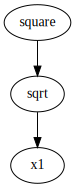

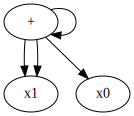

In [11]:
SR = SymbolicRegression(X, y, 3)
mom = SR.generate_expr(2)
dad = SR.generate_expr(2)

display(mom.visualize_binary_tree(mom.root()))
dad.visualize_binary_tree(dad.root())

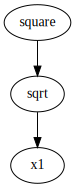

In [12]:
child = SR.crossoverSExp(mom, dad)
child.visualize_binary_tree(child.root())